![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)


# Step3 - Classification
### Titanic: Machine Learning from Disaster(https://www.kaggle.com/c/titanic)
#### 타이타닉 침몰 사고의 실제 데이터를 통해, 생존유무를 예측하는 문제를 Predictive Analytics 기법으로 문제를 풀어봅니다.

# Learning Plan

#### 이 과정을 통해서 배울 수 있는 것은 아래와 같습니다.
- 첫째, 데이터 분석의 전체 Workflow
- 둘째, ML - Classification 알고리즘

### Lesson 3-1: Exploratory Data Analysis(EDA)
In this lesson, you learn 1)Analysis of the features. 2)Finding any relations or trends considering multiple features.

### Lesson 3-2: Feature Engineering and Data Cleaning
In this lesson, you learn 1)Adding any few features. 2)Removing redundant features. 3)Converting features into suitable form for modeling.

### Lesson 3-3: Predictive Modeling
In this lesson, you learn 1)Running Basic Algorithms. 2)Cross Validation. 3)Ensembling. 4)Important Features Extraction.

                                                                                                                                     

# Reference 

- EDA To Prediction(DieTanic) by [Ashwini Swain](https://www.kaggle.com/ash316) : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

### Lesson 3-1: Exploratory Data Analysis(EDA)

## 3-1-1 : 문제 정의하기

### 타이타닉 침몰 사고의 실제 데이터를 통해, 생존유무를 예측한다.

## 3-1-2 : 훈련, 테스트 데이터 확인하기

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('./data/titanic/train.csv')

In [3]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 값이 없는 데이터 확인하기

In [5]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <관찰 결과>
- **Age, Cabin, Embarked** 가 null value 를 가지고 있습니다.

### 데이터로 부터 1차적인 Insight 알아내기 : 생존자는 몇명?

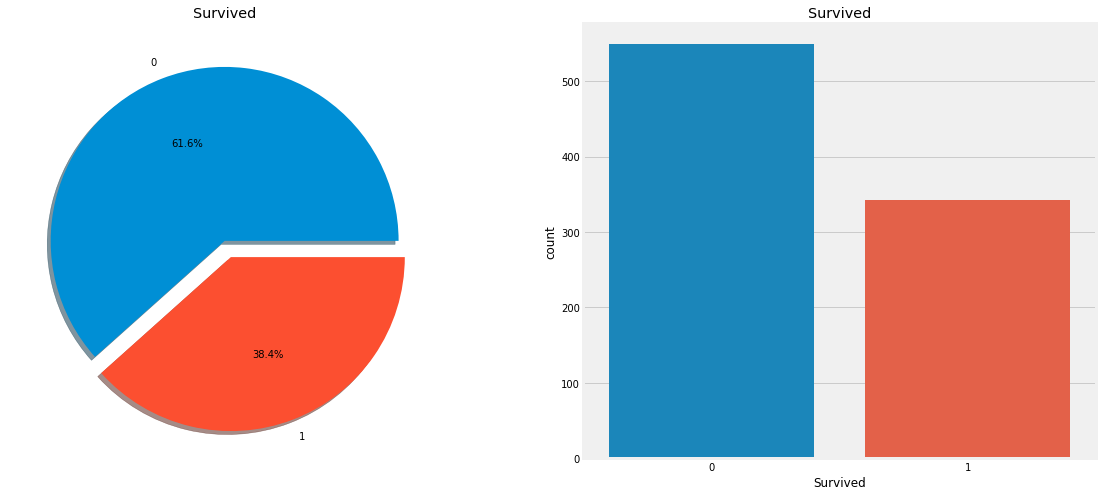

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### <관찰 결과>
- 많은 승객이 Tatanic 충돌 사고로부터 살아남지 못했습니다.

- Training Data Set을 보면, 탑승한 891 명의 승객 중 350 명만이 살아 남았습니다. 즉, 전체 Training Data Set의 승객중 **38.4%** 만이 충돌에서 살아 남았습니다. 데이터에서 더 나은 통찰력을 얻고 어떤 카테고리의 승객이 생존했는지, 생존하지 못했는지를 알아 내기 위해 더 깊게 분석해야 할 필요가 있습니다.

앞으로 Training Data Set의 다른 feature들을 사용하여 생존율을 확인해 보도록 하겠습니다. 예를들어 성별, 출생지, 나이 등의 feature들이 있습니다.

먼저 다양한 유형의 Feature들에 대해서 이해해야 합니다.

## 3-1-3 : Features 분석하기

## Types Of Features

* Categorical Features
* Ordinal Features
* Continous Features
* Discrete Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

범주형 변수(categorical variable)는 두 개 이상의 범주(Category)가 있고 해당 feature의 각 값을 범주별로 나눌 수 있습니다. 예를 들어 성별(Sex)은 두 범주(남성과 여성)가 있는 범주형 변수입니다. 범주형 변수는 정렬(Sorting)하거나 순서부여(Ordering)를 할 수 없습니다. 범주형 변수는 **Nominal Variables(명목 변수)** 라고도 합니다.

**Categorical Features in the dataset: Sex,Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

순서형 변수는 범주형 변수과 유사하지만 차이점은 값 사이의 정렬(Sorting)하거나 순서부여(Ordering)를 할 수 있다는 것입니다. 예 : **Height(키=신장)** 변수인 경우에 **Tall, Medium, Short** 값이 순서(Order)가 있습니다.

**Ordinal Features in the dataset: PClass**

### Continous Features:
A feature is said to be continous if it can take infinate values between any two points or between the minimum or maximum values in the features column.

연속형 변수는 임의의 두 점 혹은 최소값과 최대값 사이에 무한 값을 취할 수 있는 경우를 말한다.

**Continous Features in the dataset: Age**

### Discrete Features:
A feature is said to be discrete if it can take countable values between any two points or between the minimum or maximum values in the features column.

이산형 변수는 임의의 두 점 혹은 최소값과 최대값 사이에 유한 값을 취할 수 있는 경우를 말한다.

**Discrete Features in the dataset: SibSp, Parch**

## Sex--> Categorical Feature

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

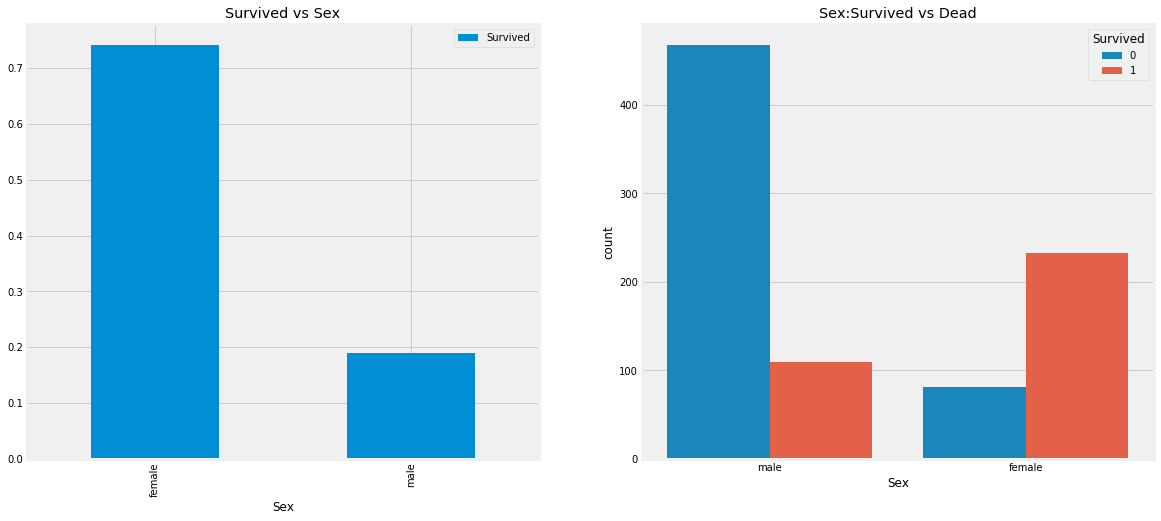

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### <관찰 결과>

- 위의 그래프는 흥미로운 결과를 보여 줍니다. 살아남은 여성의 수가 살아남은 남성의 수의 2배 정도 됩니다. 또한  **여성의 생존율은 거의 75% 인데 반해, 남성의 생존율은 거의 18-19% 정도 됩니다.**

위의 그래프는 **Sex(성별)이 매우 중요한 feature** 임을 보여줍니다. 그러나 이것이 최선일까요? 다른 feature들도 살펴보도록 합시다.

## Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


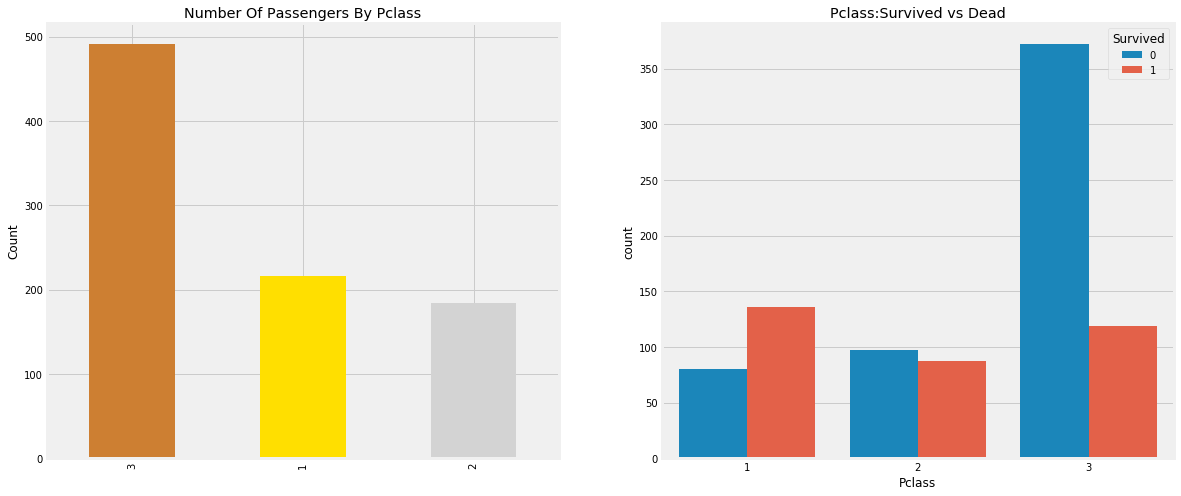

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### <관찰 결과>

- 그래프를 통해 Pclass1의 승객들이 구조 작업시에 높은 우선 순위를 부여 받았음을 유추해 볼 수 있습니다. Pclass3의 승객 수는 훨씬 많았지만 생존율은 약 **25%** 로 매우 낮습니다.

- Pclass1은 **63%** 인 반면 Pclass2는 **48%** 입니다. 이를 통해 돈과 지위가 생존율에 영향을 주었음을 알 수 있습니다.

조금도 깊은 이해를 위해서 **Sex and Pclass** 두가지 feature들을 함께 고려했을 때의 생존율을 확인해 보도록 합시다.

In [11]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

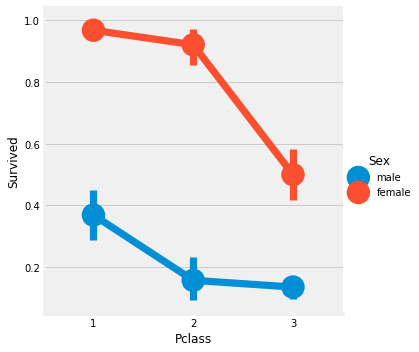

In [12]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### <관찰 결과>

**FactorPlot** 는 범주형 값을 분리해서 그래프로 볼 때, 쉽고 간단한 코딩이 가능한 이유로 자주 쓰입니다.

- **CrossTab** 및 **FactorPlot** 을 보면 **Pclass1  여성** 은 **95-96%** 에 해당하는 생존율을 볼 수 있습니다. 실제로 Pclass1의 94명의 여성 중 3명만이 사망했습니다.

- Pclass와 관계없이 여성들은 구출하는 동안 최우선 순위를 부여 받았다는 것이 유추해 볼 수 있습니다. Pclass1의 남성조차도 생존율이 매우 낮습니다.

이를 근거로 Pclass가 중요한 feature인 것을 알 수 있습니다.

## Age--> Continous Feature


In [13]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


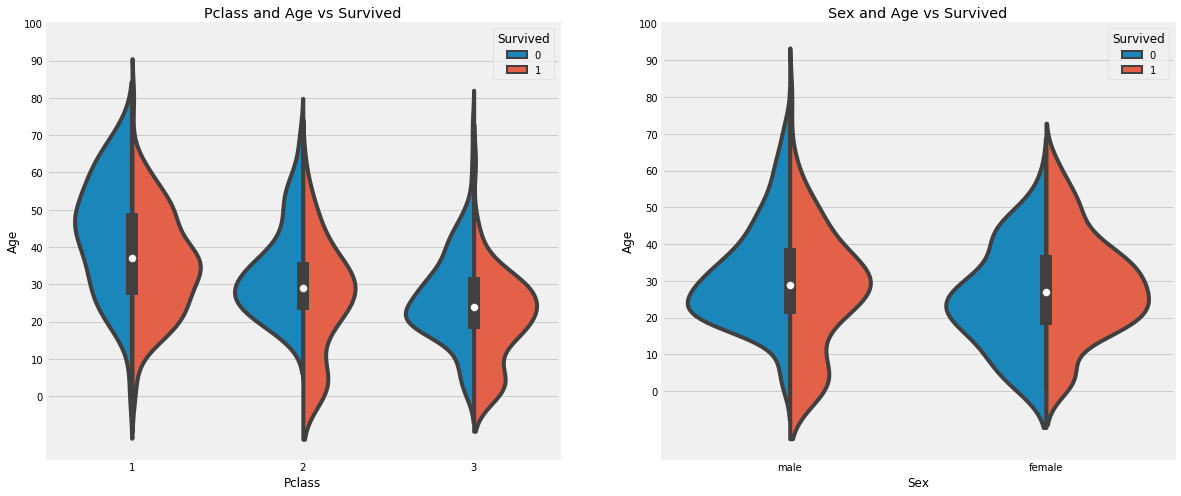

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### <관찰 결과>

1) 어린이의 수는 Pclass의 번호가 증가에 맞추어 함께 중가함. 10세 이하 어린이의 생존율이 Pclass와 관계없이 양호한 것으로 보입니다.

2) Pclass1에서 20 세에서 50 세 사이의 Passenegers에 대한 생존 기회는 높으며 여성에게는 훨씬 더 좋습니다.

3) 남성의 경우 생존율은 연령이 증가함에 따라 감소합니다.

앞서 살펴본 바와 같이 Age feature는 **177** 개의 널(null) 값을 갖습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당 할 수 있습니다.

그러데 문제는 평균 연령(29세)를 할당하기에는 Titanic 데이터의 분포상 연령대가 높은 사람들이 많이 존재한다는 것입니다. 이런 경우...예를들어, 평균 연령(29세)를 4세 어린이에게 배정한다면 문제가 될 것입니다. 이와 같이 승객의 Age feature의 NaN 값을 대체하기 위해 가장 적절한 방법은 무엇일까요?

한가지 방법은 **Name** feature를 이용하는 것입니다.. Name feature를 살펴보면 이름에 Mr.이나 Mrs.과 같은 호칭이 있다는 것을 알 수 있습니다. 따라서 Name feature가 Mr. 혹은 Mrs. 인 Age 의 평균값을 각 그룹에 NaN 값을 대체하기 위해 할당 할 수 있습니다.

In [15]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Name feature에서 호칭을 추출해 내는데 아래와 같은 Regular Expression 을 사용합니다.

- Regex: **[A-Za-z]+)\.**. 

이 Regular Expression의 의미는 **A-Z 또는 a-z** 사이에 있고 **.(점)** 이 뒤에 오는 문자열을 찾습니다.

In [16]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme와 같은 호칭은 Miss와 같은 값으로 대체합니다.

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [19]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data.Age.isnull().any() #So no null values left finally 

False

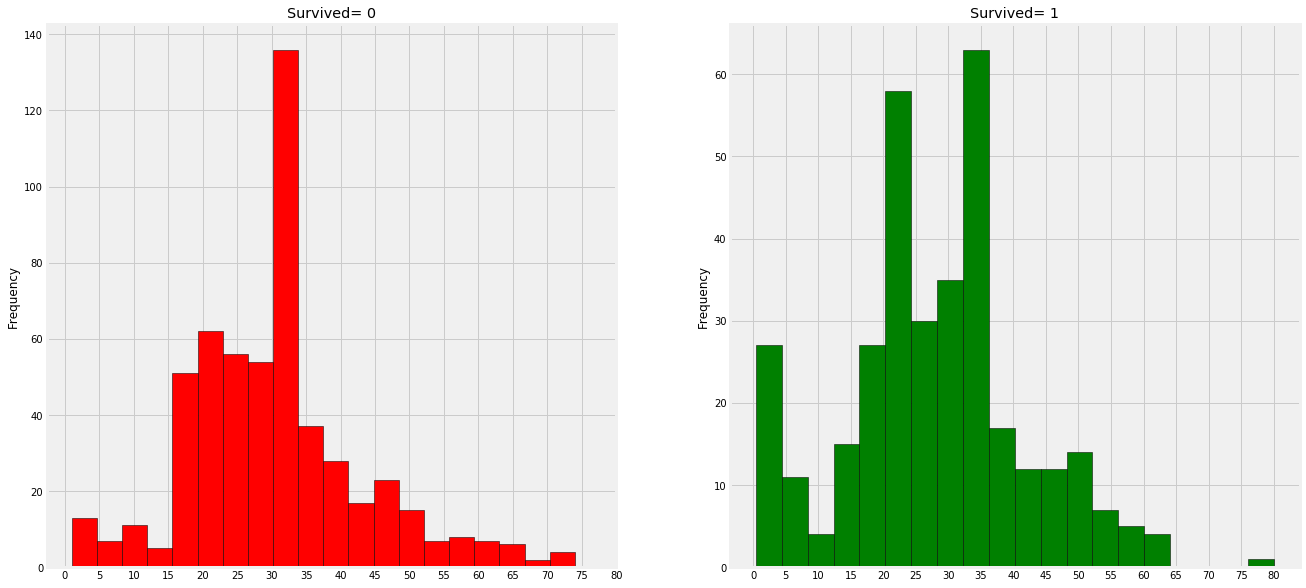

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### <관찰 결과>
1) 유아(5세 미만)는 많이 살아 남았음.(여성과 어린이 우선 정책).

2) 가장 나이 많은 승객이 살아 남았음.(80세 이상 구간).

3) 최대로 많이 사망한 연령대는 30-40 구간임.

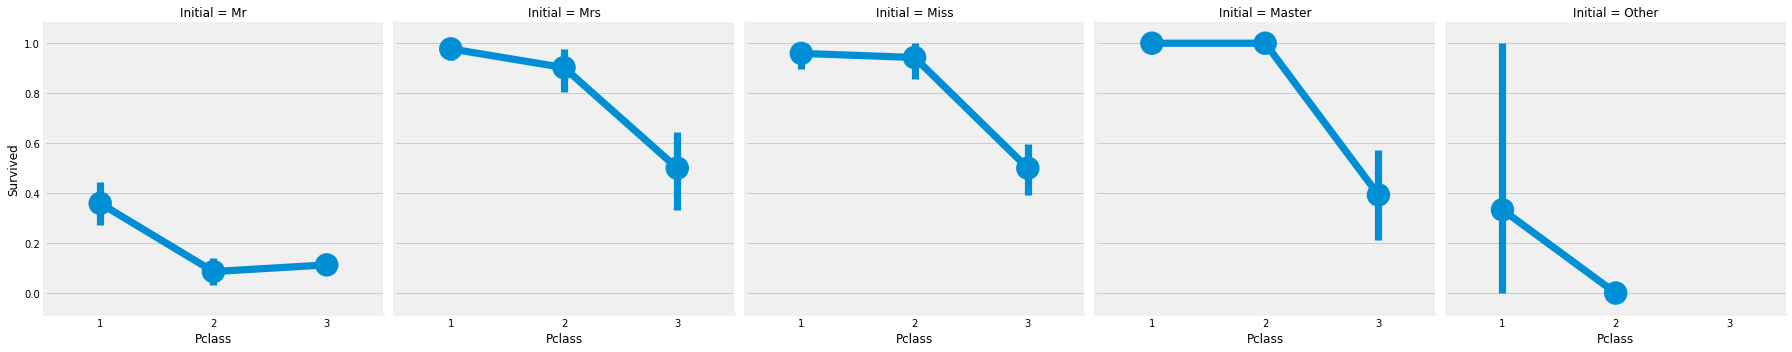

In [22]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

여성과 어린이 우선 정책은 어떤 Pclass와 상관없이 일관되게 유지됨.

## Embarked--> Categorical Value

In [23]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

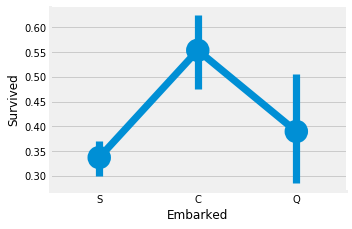

In [24]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트C 에서 승선한 승객들의 생존율이 약 0.55로 가장 높고 포트S에 승선한 승객들의 생존율이 가장 낮음,

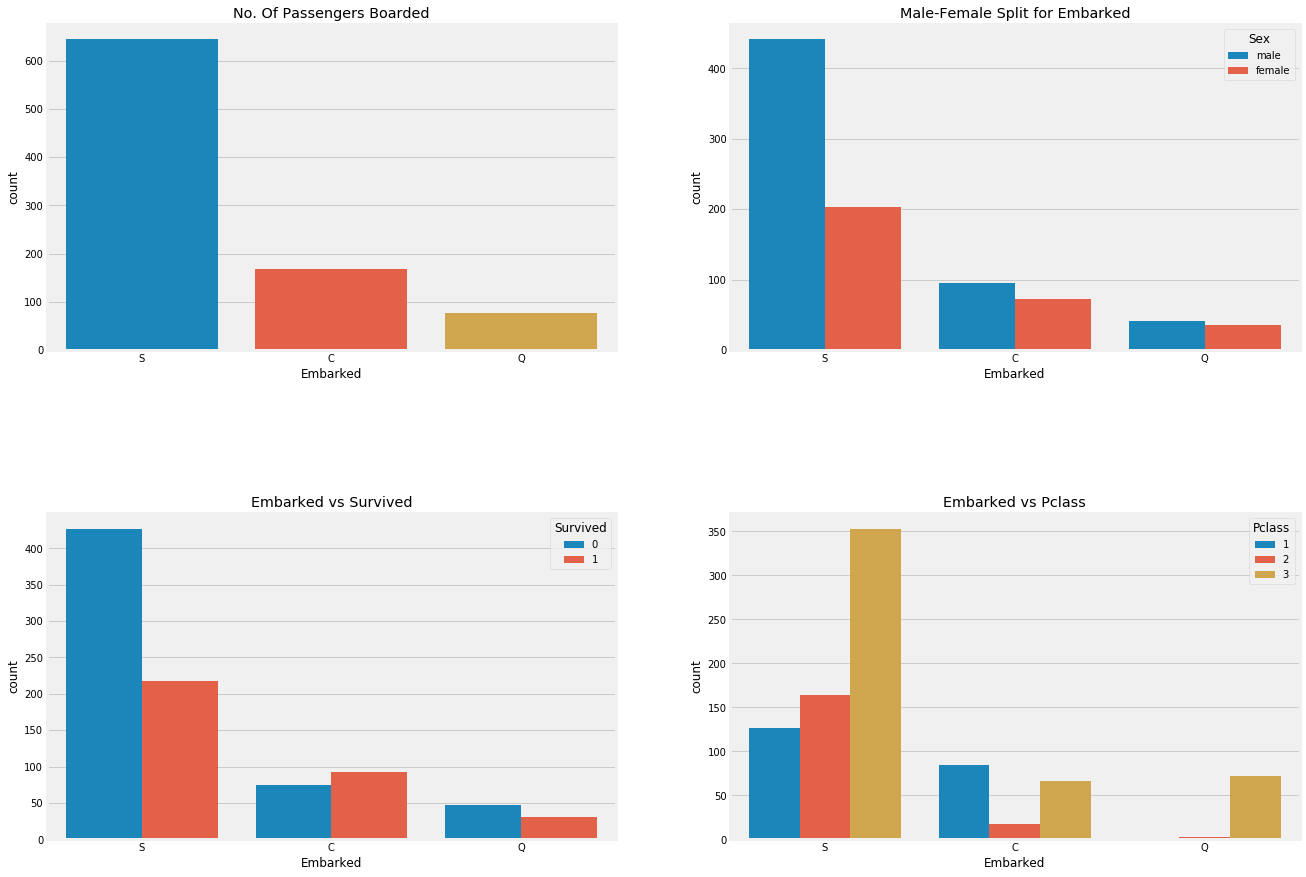

In [25]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### <관찰 결과>
1)포트Q에서 승선한 승객은 대부분 Pclass3 승객임.(약 95%)

2)포트C에서 승선한 승객은 절반 이상 살아남았음. 그 이유는 승객들이 대부분 Pclass1 와 Pclass2 임.

3)포트S에서 승선한 승객은 대부부은 부자였던 것으로 판단됨. 그럼에도 생존율이 좋지 않은 것은 Pclass3 승객 중 약 **81%** 가 살아남지 못했기 때문임. 

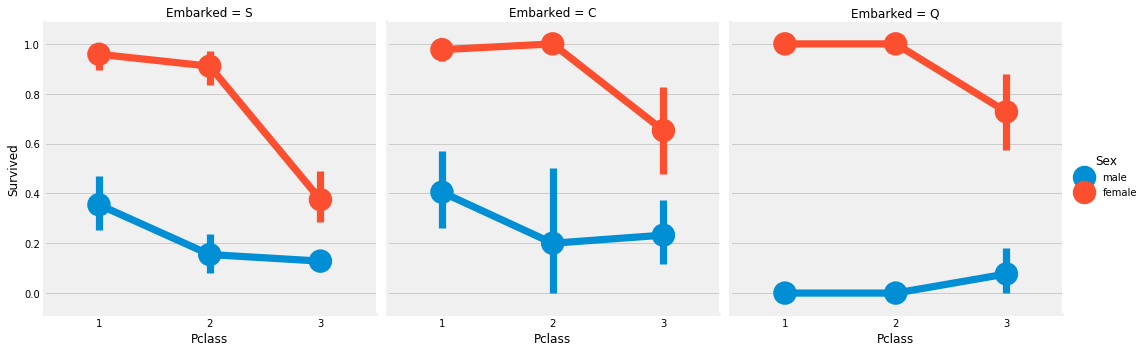

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### <관찰 결과>

1) Pclass1과 Pclass2에 대한 여성의 생존률은 거의 1임.

2) 포트S에서 승선한 승객들 중 Pclass3인 승객은 남녀 모두의 생존율이 매우 낮음.

3) 포트Q에서 승선한 승객들 중 Pclass와 상관없이 남자에 대해서 생존율이 매우 낮음.


### Filling Embarked NaN

Embarked feature에 대해서 NaN으로 된 데이터는 2개입니다. 이를 S로 대체합니다.(특별한 이유는 없고 포트S에서 승선한 승객이 가장 많으므로 2개를 더한다고 해서 전체적인 데이터 분포에 영향을 주지 않는다고 판담함)

In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSp-->Discrete Feature
이 feature 를 통해서 승객이 혼자 승선했는지 아니면 가족(형제관계 혹은 부부관계)과 함께 승선했는지 여부를 알 수 있음.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife 

In [29]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


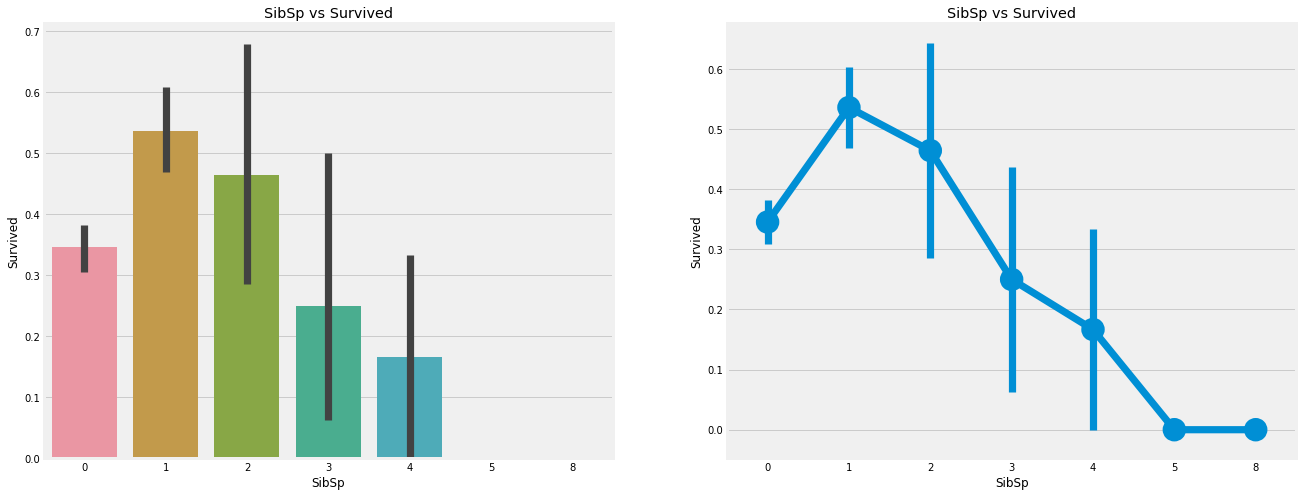

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### <관찰 결과>

- barplot 와 factorplot 은 가족없이 혼자 승선한 승객에 대해서 34.5%의 생존율을 보여줍니다. SibSp 가 증가하면 그래프가 대략적으로 감소합니다. 일반적으로 가족이 있다면, 가족을 구하려고 더 노력할 것입니다. 놀라운 사실은 5-8 명으로 구성된 가족의 생존율은 **0%** 입니다. 

- 이유는 **Pclass** 에 있었습니다. crosstab 은 SibSp > 3 인 승객이 모두 Pclass3에 있음을 보여줍니다. Pclass3(>3)인 승객은 모두 살아남지 못했습니다.

## Parch-->Discrete Feature

이 feature 를 통해서 승객이 혼자 승선했는지 아니면 가족(부모자식관계)과 함께 승선했는지 여부를 알 수 있음.

Parents = father, mother, stepfather, stepmother

Children = son, daughter 

In [32]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


### <관찰 결과>
- crosstab 결과로 보건데...대가족은 Pclass3인 경우가 대부분임.

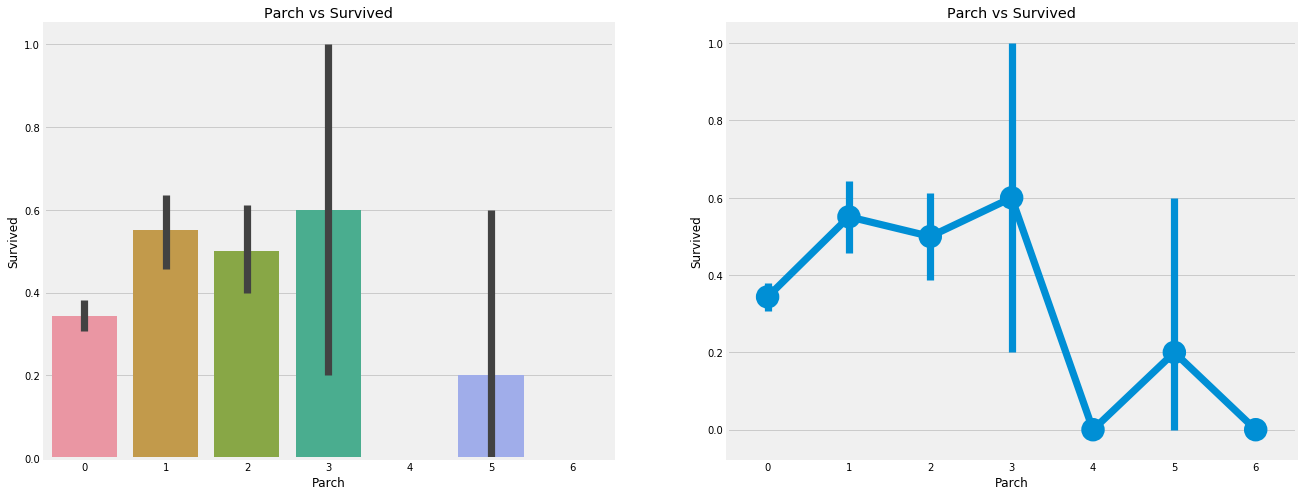

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

### <관찰 결과>

- SibSp 와 결과가 매우 비슷합니다. 가족이 함께 탑승한 승객은 생존 기회가 더 큽니다. 그러나 parch 숫자가 올라감에 따라 감소합니다.

- 1-3 명의 가족(부모 혹은 자식)을 가진 승객은 혼자 승선한 승객보다 생존율이 높습니다. 4명 이상의 가족(부모 혹은 자식)을 가진 승객의 생존율은 낮습니다.

## Fare--> Continous Feature

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


### <관찰 결과>

- 가장 낮은 요금은 **0.0** 입니다.

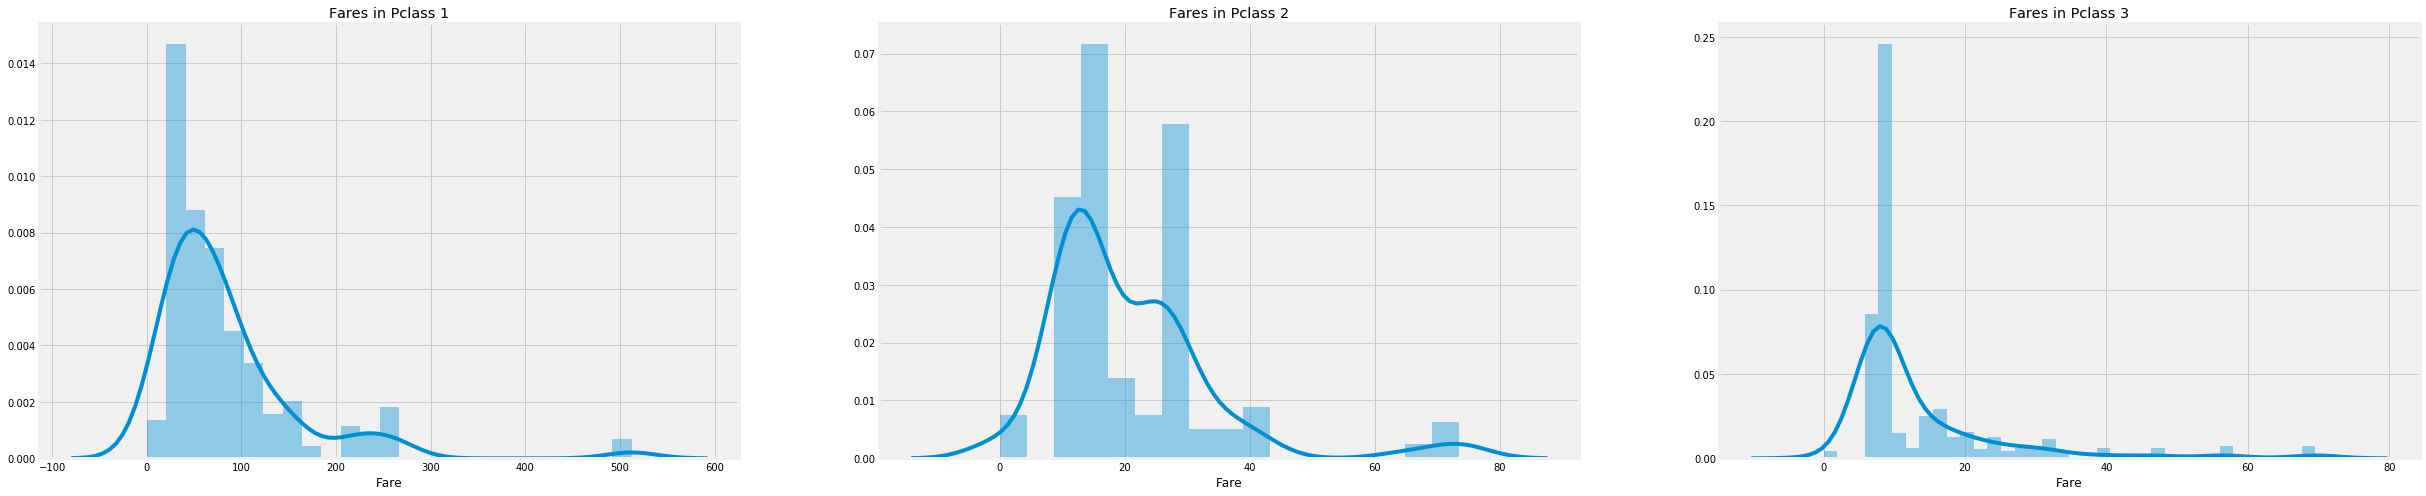

In [35]:
f,ax=plt.subplots(1,3,figsize=(38,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### <관찰 결과>

- Pclass1 의 분포가 Fare 값으로 봤을 때 가장 넓게 분포되어 있음. 

## <전체 feature들에 대한 관찰 결과>

- **Sex:** 남자보다 여자일 때 생존율이 높음.

- **Pclass:** **1등석 승객**의 생존율이 매우 높음. **Pclass3의 생존율은 매우 낮음**. **여성**의 경우 **Pclass1** 의 생존율이 1이며 **Pclass2** 의 생존율도 높음. **생존하기 위해서 돈과 지위가 매우 중요했다는 사실을 보여줌.**. 

- **Age:** 5-10세 미만의 어린이는 생존율이 높음. 15~35세 사이의 승객이 많이 사망함.

- **Embarked** : 흥미로운 사실을 볼수 있음 **Pclass1 승객의 대다수가 S에서 일어났음에도 불구하고 C에서의 생존율이 더 높음.** Q에서의 생존한 승객은 모두 **Pclass3** 에서 나왔음.

- **Parch+SibSp:** 1-2명의 형제자매/배우자 혹은 1-3명의 부모/자식과 함께 승선한 승객이 혼자 승선했거나 대가족과 함께 승선한 승객보다 생존율이 높음.

## Correlation Between The Features

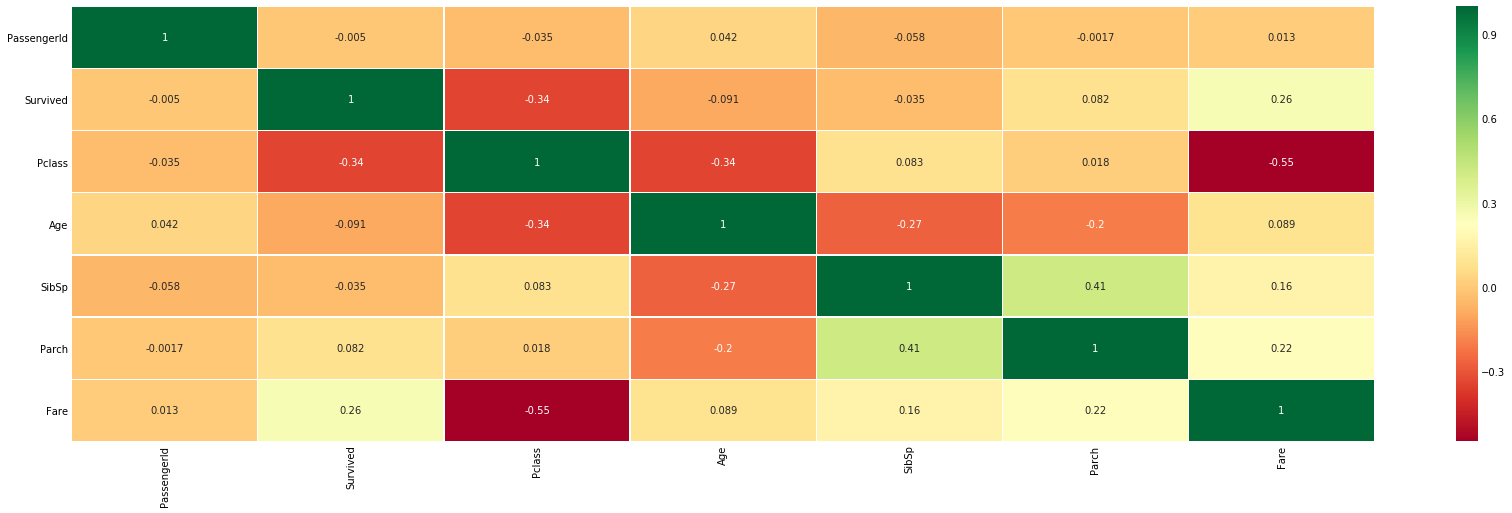

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(26,8)
plt.show()

## <관찰 결과>

heatmap은 feature들 간에 어떤 상관 관계가 있는지 살펴볼 때 유용합니다. 유의할 점은 알파벳이나 문자열 간의 상관 관계가 명확하게 표현되지 않으므로 숫자형 feature 만 비교된다는 것입니다. 

- **POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

- **NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

두 feature들 간의 상관관계가 매우 높다는 것은 한 feature의 값이 증가하면 다른 feature의 값도 증가한다는 뜻입니다. 이 경우 두 feature는 모두 매우 유사한 정보를 표현하고 그 정보들의 차이가 거의 없다는 것을 뜻합니다. 이것을 **MultiColinearity** 라고 합니다..

이 경우 **둘 중의 하나는 불필표합니다.**. 모델을 만들거나 Training하는 동안 Training Time을 줄이기 위해서 중복된 feature를 제거하는 노력이 필요합니다.

위의 heatmap 그래프로부터 feature들 간의 상관 관계가 없는 것을 볼 수 있습니다. 가장 높은 상관 관계를 보이는 것을 꼽아보자면 **SibSp와 Parch 사이, 0.41** 정도인데 0.41의 수치가 **MultiColinearity** 라고 판단하기는 힘듭니다. 따라서 feature 제거 없이 모든 feature들을 사용합니다.

# Lesson 3-2: Feature Engineering and Data Cleaning

Feature Engineering 이란?

다수의 feature들이 주어졌을 때, 모든 feature가 모두 중요하지는 않습니다. feature들 중에는 제거되어야 하는 redundent feature이 존재하고 때로는 다른 feature들에서 부터 새로운 feature를 추가할 수도 있습니다.

한 예로 앞에서 'Name' feature에서 'Initial' feature를 뽑아내어 새로운 feature로 추가한 경우를 보았습니다. 이 처럼 새로운 feature를 추가하거나 몇가지 feature는 제거하는 것이 필요합니다. 결국 Feature Engineering은 주어진 Dataset에 존재하는 feature를 예측 모델링에 적합한 형태의 Feature로 변환하는 과정이라고 보아야 할 것입니다.

## Age_band

####  Age Feature 의 문제점:
- **Age는 Continous Feature입니다**. 이것이 문제가 될 수 있습니다.

- 예들들어 스포츠 선수를 **Sex(성별)** 로 묶어보면, 쉽게 '남'과 '여' 두가지 그룹으로 나누어 묶을 수 있습니다.

- 만약 스포츠 선수를 **Age** 로 묶어본다면 어떻까요? 만약 30명이 있다면, 이 경우 30개의 서로 다른 Age 값이 있을 것이고 이것이 Continous Feature의 문제점이 됩니다.

**Continous Feature는 Categorical Feature** 로 변경할 필요가 있습니다. 이 때 사용되는 기법이 Binning 혹은 Normalisation 입니다. 여기서는 Binning을 사용해 봅니다.

승객의 나이중 최대값이 80이므로... 0-80 구간을 5개의 bin으로 나누어봅니다. 80/5=16.
하나의 bin의 사이즈는 16이 됩니다.

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [49]:
type(data['Age_band'].value_counts())

pandas.core.series.Series

In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


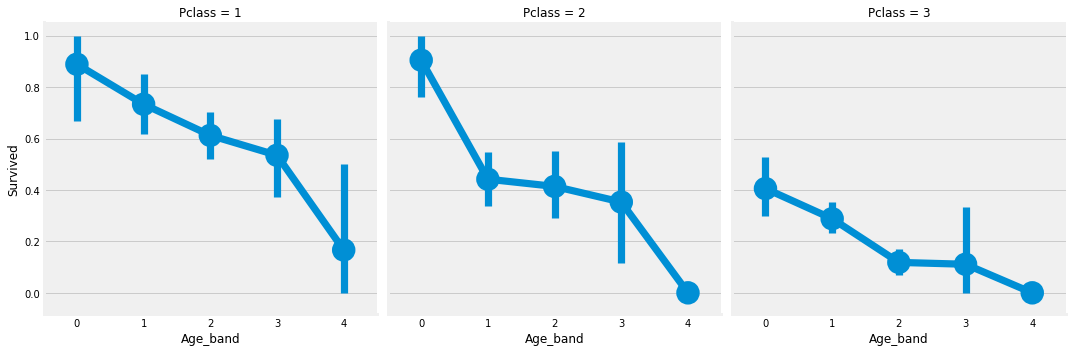

In [39]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

### <관찰 결과>

Pclass와 관계없이 Age_band가 증가함에 따라 생존율이 감소합니다.


## Family_Size and Alone
"Family_size" 와 "Alone" 이라는 feature를 추가해서 분석해 봅시다. "Family_size" 와 "Alone"는 "Parch" 과 "SibSp"를 이용해서 만듭니다. "Family_size"의 경우는 생존율이 승객의 "Family Size"와 관련이 있는지를 확인할 수 있도록 "Parch" 과 "SibSp"를 합한 feature를 새로 만든 것입니다. "Alone"은 승객이 혼자 승선했는지 여부를 나타내는 새로운 feature 입니다.

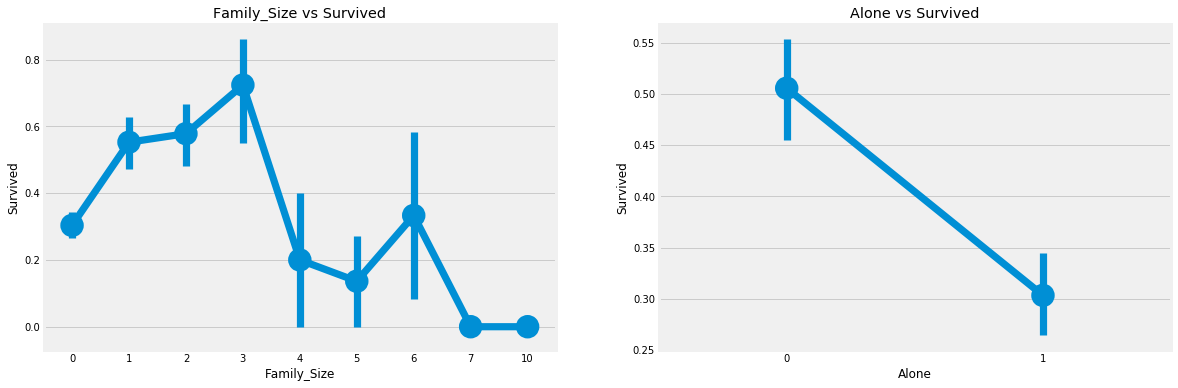

In [40]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0 는 가족없이 혼자 승선한 승객이라는 뜻입니다.** family_size=0인 경우 생존율니 낮습니다. family_size > 4 인 경우 생존율이 급격히 떨어집니다. 따라서 이 feature도 예측 모델에 유입될 수 있는 중요한 feature라고 보여집니다.

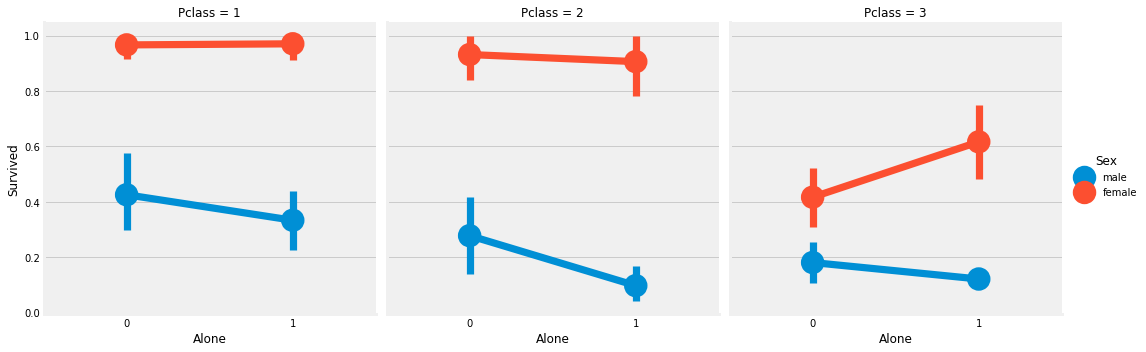

In [41]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### <관찰 결과>

혼자 승선한 승객은 "Sex", "Pclass"와 상관없이 생존율이 낮습니다. 단 예외적으로 Pclass3 이면서 여성인 승객인 경우는 혼자 승선한 승객인 경우가 가족과 함께 승ㅎ선한 승객보다 생존율이 높습니다.

## Fare_Range

"Fare"는 Continous Feature 입니다. Continous Feature를 Ordinal Feature로 바꿉니다. 이 때 **pandas.qcut** 를 사용합니다.

**qcut** 은 입력으로 전달된 bin의 갯수만 큼 나누어 줍니다. 5 bin으로 나눈다면, 일정한 값으로 나누어진 5개의 구간이 리턴됩니다.

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


### <관찰 결과>

**fare_range 가 증가하면, 생존율이 증가한다.**

## Fare_cat

In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

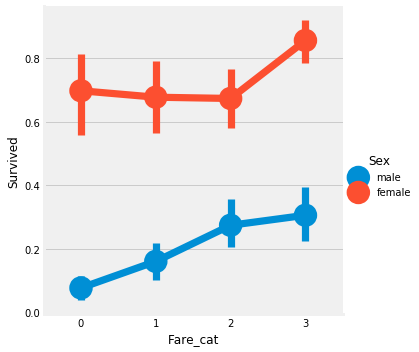

In [44]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

### <관찰 결과>

**fare_cat 가 증가하면, 생존율이 증가한다.**

## Converting String Values into Numeric

일반적으로...머신러닝 모델의 입력으로 String 값을 넣을 수 없으므로, "Sex", "Embarked" 같은 문자형 feature을 숫자형 feature들로 변환해야만 합니다.

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping UnNeeded Features

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

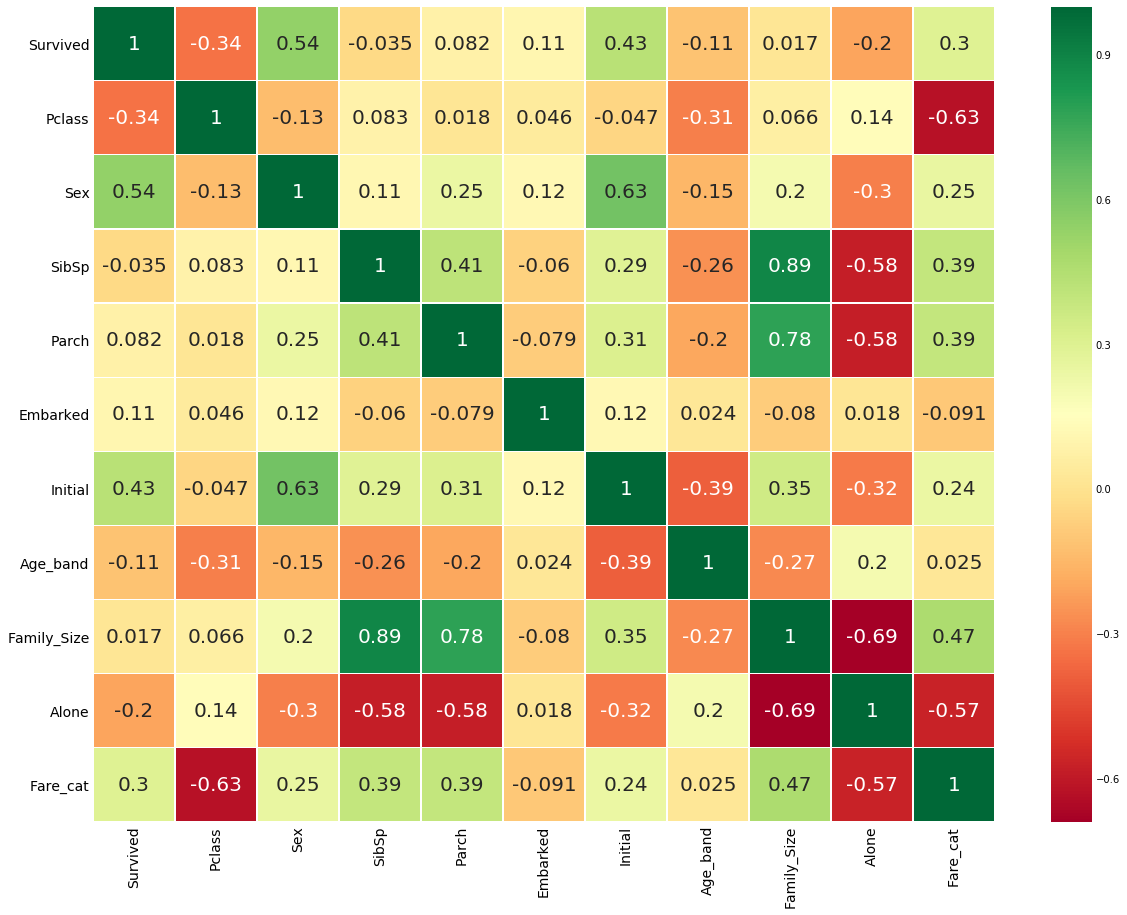

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### <관찰 결과>

heatmap을 봤을 때, feature들 간의 Positive 상관관계를 볼 수 있다. 예들들어...**SibSp and Family_Size**, **Parch and Family_Size** 또한 Negative 상관관계도 볼 수 있다. 예들들어...**Alone and Family_Size**

# Lesson 3-3: Predictive Modeling

지금까지 EDA를 통해서 Titanic 데이터에 대한 인사이트를 얻었습니다. 하지만 EDA만으로 우리가 풀고자하는 문제(Titanic 승객들의 사고에서 살아남을지 죽을지 여부를 예측)에 대한 모델의 성능을 높힐 수 없습니다. 지금부터는 여러가지 Classification 알고리즘을 통해 어떻게 문제를 풀수 있을지 알아봅니다.

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [47]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [48]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [49]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [50]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


### Decision Tree

In [52]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.7985074626865671


### K-Nearest Neighbours(KNN)

In [53]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


**n_neighbours** 속성의 값을 변경함에 따라 KNN 모델의 정확도가 변경됩니다. 기본값은 **5**입니다. n_neighbours의 다양한 값에 대한 정확성을 확인할 수 있습니다.

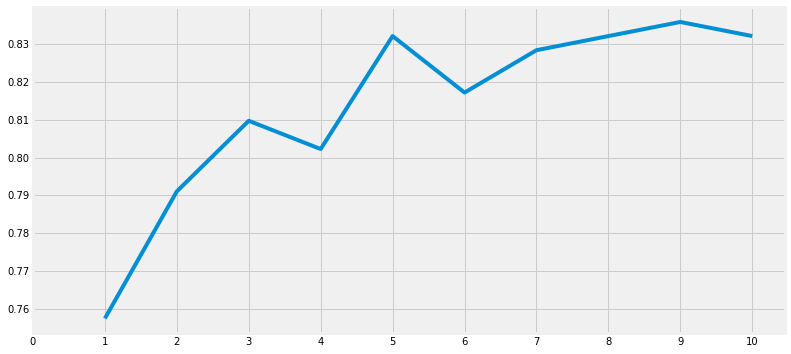

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [54]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [55]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [56]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


모델의 정확성(Accuracy) 만이 Classifier(=Classification Model)의 견고성(Robustness)을 결정하는 유일한 요소는 아닙니다. Classifier를 훈련 데이터(Training Data)를 통해 학습하고 테스트 데이터(Test Data)를 통해 테스트 한 결과 정확도(Accuracy)가 90%라고 가정해 봅시다.

이것이 매우 정확한 정확도이기는 하지만 새로운 테스트 데이터에 대해 90%가 될 것이라고 확신 할 수 없습니다. 왜냐하면 훈련 데이터(Training Data) 및 테스트 데이터(Test Data)가 변경되면 Classifier의 정확도(Accuracy)는 변경되기 때문입니다. 데이터의 분포에 따라 정확도가 더 좋아지거나 더 나빠질 수 있습니다. 이를 **Model Variation** 이라고 합니다.

Variation을 극복하고 더 일반화 된 모델을 얻기위해 **Cross Validation** 라는 기법을 사용합니다.

# Cross Validation

대부분의 경우 데이터는 불균형합니다. 특히 데이터셑의 크기가 작은 경우 테스트셑에 대한 성능 평가의 신뢰성이 떨어지게 됩니다. 테스트셑을 어떻게 잡느냐에 따라 성능이 매우 다르게 측정될수 있고 이를 해결하기 위해 Cross Validation은 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. 

![](https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E)

출처: https://3months.tistory.com/321 [Deep Play]. 

## K-Fold Cross Validation
1) K-Fold Cross Validation은 먼저 데이터 집합을 k개의 부분 집합으로 나눕니다.
2) 데이터 세트를 (k = 5) 부분으로 나누어 봅시다. 우리는 테스트를 위해 1 부분을 예약하고 4 부분에 걸쳐 알고리즘을 훈련시킵니다.
3) 각 Iteration 에서 테스트 부분을 변경하고 학습하는 프로세스를 계속 진행합니다. 
4) 모든 Iteration이 끝나고 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가합니다.

각 Iteration에서 평가된 모델은 어떤 경우는 underfit 어떤 경우는 overfit 될 수 있습니다. 이들에 대한 평균을 구하므로...Cross Validation을 통해 좀 더 일반화된 모델을 얻을 수 있습니다.

In [57]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.810375,0.029947
Naive Bayes,0.801386,0.028999
Random Forest,0.815955,0.029684


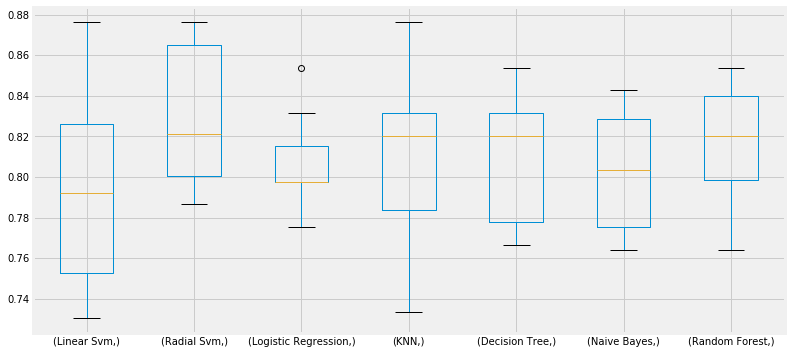

In [58]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

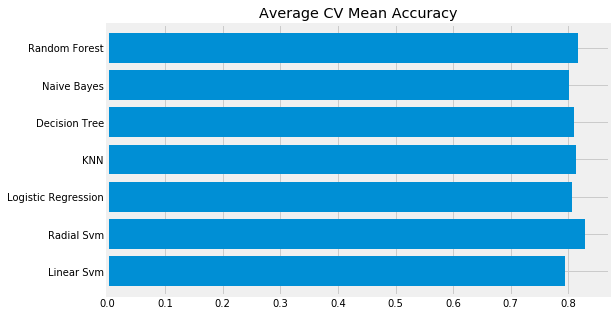

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

정확도(Accuracy)가 가장 일반적으로 쓰이는 성능평가 지표이고 직관적으로 이해하기 쉽다는 장점이 있지만...데이터의 분균형으로 인해 클래스의 비율이 한 쪽으로 치우쳐 있을 경우는 평가가 어렵다.(Imbalanced dataset problem)

혼잡행렬(Confusion Matrix)은 정확도보다 더 자세한 정보를 보여준다.

![](https://image.slidesharecdn.com/5-180206050322/95/5model-evaluation-and-improvementepoch2-2-11-638.jpg?cb=1517893429)

출처 : https://www.slideshare.net/RickyPark3/5model-evaluation-and-improvementepoch2-2-87291677

참고 : https://bcho.tistory.com/1206

In [61]:
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
pd.DataFrame(confusion_matrix(Y, y_pred), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,491,58
Actual Positive,95,247


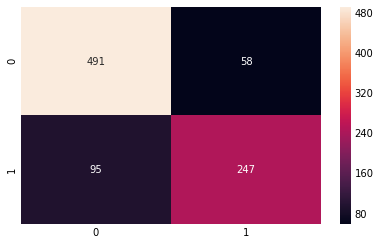

In [62]:
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')

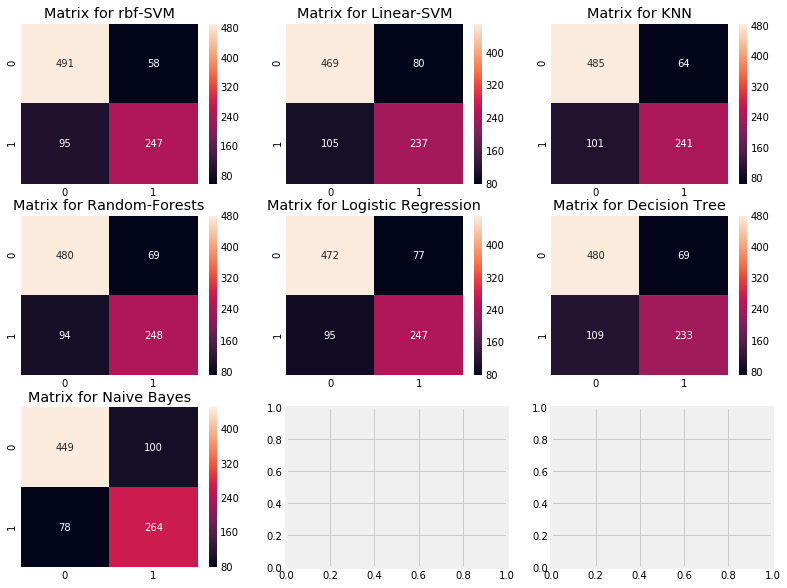

In [60]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

왼쪽 대각선은 각 클래스에 대한 올바른 예측의 수를 나타내지 만 오른쪽 대각선은 잘못된 예측의 수를 나타냅니다. rbf-SVM에 대한 첫 번째 플롯을 분석해 보겠습니다.

1)Accuracy 구하기 : 올바르게 예측한 수는 **491(for dead) + 247(for survived)** 따라서 Mean CV Accuracy 는 **(491+247)/891 = 82.8%** 입니다.

2)**Errors** 보기 : 58명의 사망자를 생존자로 잘못 분류하고 95명의 생존자를 사망자로 잘못 분류했습니다. 따라서 이 모델은 살아남은 것처럼 죽은자를 예측함으로써 더 많은 실수를 범했습니다.

rbf-SVM이 죽은 승객을 올바르게 예측할 확률이 높지만 NaiveBayes는 살아남은 승객을 정확하게 예측할 확률이 높다고 말할 수 있습니다.

### Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

#### SVM

In [61]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   14.5s finished


#### Random Forests

In [62]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   15.5s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


The best score for Rbf-Svm is **82.82% with C=0.05 and gamma=0.1**.
For RandomForest, score is abt **81.8% with n_estimators=900**.

# Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237660310974917


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.

In [64]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


#### Bagged DecisionTree


In [65]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree.  But we can change the dafault base_estimator to any algorithm of our choice.

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


#### Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


#### XGBoost

In [68]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

ModuleNotFoundError: No module named 'xgboost'

We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

#### Hyper-Parameter Tuning for AdaBoost

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

The maximum accuracy we can get with AdaBoost is **83.16% with n_estimators=200 and learning_rate=0.05**

### Confusion Matrix for the Best Model

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

#### Observations:

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are:
1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

### Thanks a lot for having a look at this notebook. If you found this notebook useful, **Do Upvote**.
